# Study of client churn of a regional bank

Bank Metanprom is located in Yaroslavl and regional cities: Rostov Veliky and Rybinsk. The bank has recently experienced a strong client churn. The marketing department requested a study of outflow client segments in order to launch marketing campaigns for this contingent of clients.

<b>Research Objective:</b> to analyze the bank's clients and identify compact and high-precision segments of clients who tend to leave the bank.

<b>Objective of the study:</b> highlighting clear segments of churn clients for subsequent development of a marketing campaign to prevent client churn.

<b>The study includes the following steps:</b>

- Opening a file and getting general information about a dataset;

- Data preprocessing (working with skips, column signatures, duplicates, anomalous values, data types);

- Research analysis of data (identification of significant signs of churn (intervals of characteristic values that are associated with increased churn, formation and comparison of portraits of typical clients who are inclined and not inclined to leave the bank, based on comparison of the following attributes: number of properties, number of bank products, activity, balance, etc., study of correlations of both quantitative and qualitative attributes by Phik method);

- Allocation of homogeneous segments of clients based on the association of attributes: at least three segments including from 500 to 2000 clients;

- Formulation and testing of statistical hypotheses (the first hypothesis about the difference in income between those customers who left and those who stayed, the second hypothesis about the influence of one of the indicators (balance, age, credit card availability, activity, number of bank products) on customer churn);

- Formulation of conclusions on the study and development of recommendations for working with customers who, based on the highlighted features, may leave the bank.

<b>Data Description:</b>

- `userid;
- `score` — credit scoring points;
- `City`;
- `Gender`;
- `Age`;
- `equity` — property score;
- `Balance` —  account balance;
- `Products` — number of bank products used by the client;
- `CreditCard`;
- ` last_activity` —  active client;
- `est_salary` — client salary;
- `Churn` — whether the client is gone or not.

## Open the data file and examine the general information

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings; warnings.filterwarnings(action = 'ignore')

!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.head(20)
# opening a file and outputting the first 20 rows

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [3]:
data.info()
# obtaining general information about data types and their number in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
data['city'].value_counts()
# determining the number of clients in each of the three cities

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [5]:
data['gender'].value_counts()
# gender distribution

М    5005
Ж    4995
Name: gender, dtype: int64

In [6]:
# renaming of city names and gender for further work (translation into English)
data['city'] = data['city'].replace({'Ярославль': 'Yaroslavl', 'Рыбинск': 'Rybinsk', 'Ростов': 'Rostov'})
data['gender'] = data['gender'].replace({'М': 'Male', 'Ж': 'Female'})

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

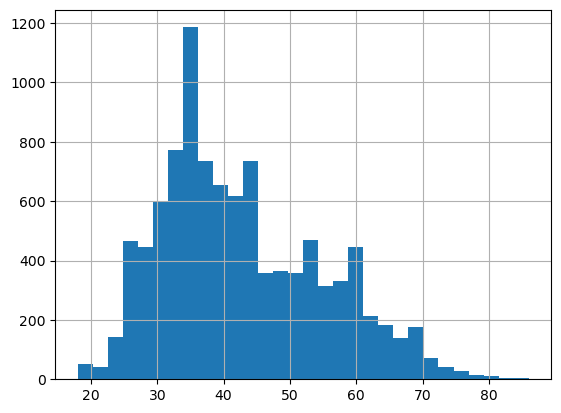

In [7]:
display(data['age'].describe())
data['age'].hist(bins=30);
# age distribution

In [8]:
data['equity'].value_counts()
# distribution of clients by number of ownership points

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

In [9]:
data['products'].value_counts()
# distribution of customers by number of bank products

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

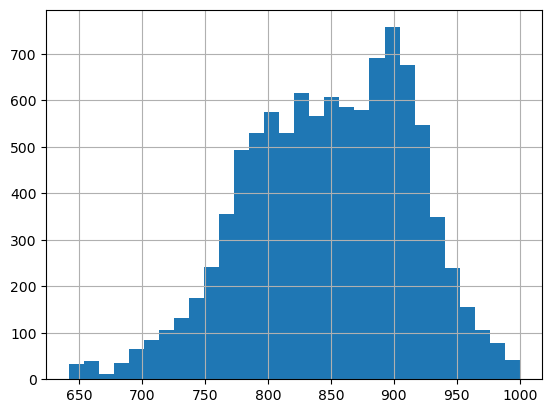

In [10]:
display(data['score'].describe())
data['score'].hist(bins=30);
# distribution of clients by credit scoring

In [11]:
data['credit_card'].value_counts()
# client credit cards

1    6804
0    3196
Name: credit_card, dtype: int64

In [12]:
data['last_activity'].value_counts()
# whether the client is active at the time of uploading the database

1    5235
0    4765
Name: last_activity, dtype: int64

In [13]:
data['churn'].value_counts()
# whether the client has left the bank

0    8180
1    1820
Name: churn, dtype: int64

<div style="border:solid green 2px; padding: 20px">

**Overview of general information:** 
- Interpretation of values in columns with 0 and 1 is standard: 1 - True, 0 - False.
- There are 12 columns and 10000 rows in the table, but two columns have less filled values: the column with age (age) and balance (balance).   
- In the score, age columns integers are written with float type.
- The most clients are in Yaroslavl - 5888, second place is occupied by Rybinsk - 2695, and the least number of clients is in Rostov Velikiy - 1417. This distribution looks logical considering the population in these cities (Rostov is the least).
- The number of men and women in the dataset is approximately the same: 5005 and 4995 respectively. 
- The bank's clients are people aged 18 to 86, which looks plausible. The largest number of customers is between the ages of 33 and 35, and there are just as many customers between the ages of 29 and 45. 
- There are most customers with an ownership score of 0, just as many customers with scores of 5 and 4, and the least number of customers with maximum scores.
- Most clients have 1 or 2 banking products.
- The minimum credit scoring score is 642, the maximum is 1000, and the median value is 853. Most clients with scores between 800 and 950.
- 6,804 clients have a credit card and 3,196 clients present in the dataset do not have a credit card.
- Active clients at the time of unloading the dataset are slightly more than half - 5235, not active 4765.
- Clients who terminated the contract with the bank 1820 out of 10000, which is 18.2% of the total number of clients.

## Data preprocessing

### Column renaming, type conversion, skip counting

In [14]:
data.columns = data.columns.str.lower() # lowercase column names
data = data.rename(columns={'userid' : 'user_id'}) # renaming a column for better readability

In [15]:
data.isna().sum() # determining the number of missing values in each column

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [16]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')
# determining the proportion of omissions in each column

,0
balance,23.000000
age,0.300000
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
equity,0.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


<div style="border:solid green 2px; padding: 20px">
There are 26 gaps in the column with age, which is 0.26% of the total number of rows. Without specifying the age, it will be problematic to define client portraits, so these rows can be deleted. Let's take a closer look at the omissions in the balance column.

In [17]:
data = data.query('age.isna() == False') # removing rows with skips in the "age" column from the dataframe
data = data.reset_index(drop=True) # creating new indexes and deleting old ones
data.shape[0]

9974

In [18]:
data['score'] = data['score'].astype(int) 
data['age'] = data['age'].astype(int) 
# changing the data type in the score and age columns to an integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 857.3+ KB


### Working with missing values

In [19]:
nan_balance = data.query('balance.isna() == True')
nan_balance

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Rybinsk,Female,30,0,NaN,1,1,1,107683.34,0
9,133130,906,Yaroslavl,Female,67,0,NaN,1,0,1,238055.53,0
10,148929,927,Rostov,Male,52,0,NaN,1,1,1,196820.07,0
11,172184,921,Rostov,Male,41,0,NaN,1,1,1,217469.48,0
19,127034,922,Rybinsk,Female,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,208085,876,Rostov,Male,38,0,NaN,1,0,0,171763.69,0
9958,125941,729,Yaroslavl,Female,42,0,NaN,1,1,1,687538.70,0
9967,219924,884,Rybinsk,Female,36,0,NaN,1,1,1,169844.88,0
9970,139170,894,Yaroslavl,Male,46,0,NaN,1,1,0,196898.29,0


In [20]:
display(nan_balance['churn'].value_counts()) # determination of the share of departed among clients with balance missing values

display(nan_balance['last_activity'].value_counts()) 
# determining the share of active among clients with balance gaps

display(nan_balance['credit_card'].value_counts()) 
# determining the share of customers with credit cards among customers with skipped balances

display(nan_balance['products'].value_counts()) 
# Determination of the number of bank products of customers with balance gaps

nan_balance['city'].value_counts() # determining the number of clients with skips in the balance in each city

0    2266
1      13
Name: churn, dtype: int64

1    1251
0    1028
Name: last_activity, dtype: int64

1    1858
0     421
Name: credit_card, dtype: int64

1    1934
2     315
3      29
0       1
Name: products, dtype: int64

Yaroslavl    1458
Rybinsk       586
Rostov        235
Name: city, dtype: int64

In [21]:
print('Percentage of missing values in balance of total number of records:', round((len(nan_balance)*100 / len(data)), 2))

print('Percentage of clients with a balance missing values from the total number of clients from the city of Yaroslavl:',\
(nan_balance.query('city == "Yaroslavl"')['user_id'].count()*100 / data.query('city == "Yaroslavl"')['user_id']\
 .count()).round(2))

print('Percentage of clients with balance missing values from the total number of clients from Rybinsk city:',\
(nan_balance.query('city == "Rybinsk"')['user_id'].count()*100 / data.query('city == "Rybinsk"')['user_id']\
 .count()).round(2))

print('Percentage of clients with balance missing values from the total number of clients from Rostov city:',\
(nan_balance.query('city == "Rostov"')['user_id'].count()*100 / data.query('city == "Rostov"')['user_id']\
 .count()).round(2))
# determining the share of customers with missing values in the balance sheet by city

Percentage of missing values in balance of total number of records: 22.85
Percentage of clients with a balance missing values from the total number of clients from the city of Yaroslavl: 24.82
Percentage of clients with balance missing values from the total number of clients from Rybinsk city: 21.84
Percentage of clients with balance missing values from the total number of clients from Rostov city: 16.6


<div style="border:solid green 2px; padding: 20px">
    The total number of omissions in the balance column is 2279, which is 22.85% of the total number of rows. At the same time, the vast majority of such clients are not current, and only 13 of them terminated their contract with the bank. Active clients are 1251, inactive - 1028 (the share of active clients is even higher than for the whole dataframe). Most of the clients with balance gaps are credit card holders - 1858. Also the vast majority of such clients have 1 product - 1934 people (most likely, many of them have a credit card).
    
    Most of the clients with missing values in the balance from Yaroslavl - 1458 (almost 64% of the number of lines with missing values). In general, the distribution by cities is similar to the distribution of the original dataframe. The share of missing values by city is highest in Yaroslavl - 24.82%, lowest in Rostov - 16.6%.
    
    Since we do not know the date of dataset unloading and the period for which the data were provided, it is difficult to assume what caused such a large number of omissions and whether they appeared at once or at different times. One might assume that the appearance of missing value is somehow related to the issuance of a credit card, but 421 clients do not have a credit card, but do have a missing value. Most likely, there was some technical problem with combining data on different customer accounts into this column. Deleting this much data would distort the overall picture, the other columns of these rows are informative, so it is better to leave these records.

### Duplicate processing

In [22]:
data.duplicated().sum() # search for strings - complete duplicates

0

In [23]:
data['user_id'].value_counts().head(50) # search for non-unique id

195884    2
117943    2
220816    2
185748    2
126368    2
183510    2
217826    2
160075    2
131419    2
152479    2
143592    2
164676    2
172142    2
175730    2
124450    2
217619    2
191520    2
155765    2
150667    2
217412    2
208081    2
129785    2
190253    2
148826    2
226719    2
171751    2
141265    2
210662    2
120258    2
211130    2
227795    2
208815    2
140377    2
217643    2
123461    2
210627    2
199312    2
208738    2
162053    2
210792    2
116540    2
155872    2
200863    2
168998    2
181526    2
170312    2
188957    2
197364    2
163207    2
149365    2
Name: user_id, dtype: int64

In [24]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None) # display the entire table

data[data['user_id'].duplicated(keep=False)].sort_values(by='user_id')
# output duplicate rows by id

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1892,116540,883,Rybinsk,Female,55,1,362756.49,3,0,1,175920.48,1
7683,116540,887,Yaroslavl,Female,38,0,NaN,1,0,1,119247.61,0
4862,117943,855,Rybinsk,Female,32,6,1036832.93,4,1,1,107792.71,1
7531,117943,880,Yaroslavl,Female,40,0,NaN,1,1,0,137718.93,0
5856,120258,908,Rybinsk,Female,38,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300,220816,934,Rybinsk,Female,74,5,1294285.39,3,1,0,95606.80,0
2594,226719,990,Yaroslavl,Male,37,4,14648692.14,2,0,0,934412.61,1
4212,226719,903,Rybinsk,Female,63,0,NaN,1,1,0,138582.58,0
8192,227795,840,Rybinsk,Male,34,2,350768.03,1,1,0,102036.14,1


<div style="border:solid green 2px; padding: 20px">
   There are no complete duplicates. There are 50 pairs of duplicates by user_id in the dataset. Within each pair the city is either Yaroslavl or Rybinsk, and if one contract is closed, the other is open. We can assume that at some stage of the bank's activity there was an autonomous program of assigning id to clients in each city, and when one client closed a contract, the same unique number could be assigned to another client who contacted the bank. The other indicators in the duplicate pairs are also different, so the records of all customers are important. The id itself is not so important for further analysis, so you can leave them as they are without renaming.

### Processing of anomalous values

count    9.974000e+03
mean     1.477868e+05
std      1.392855e+05
min      2.546300e+03
25%      7.525166e+04
50%      1.196268e+05
75%      1.744998e+05
max      1.395064e+06
Name: est_salary, dtype: float64

95 and 99 percentiles of the salary column: [316360.5815 886322.5299]


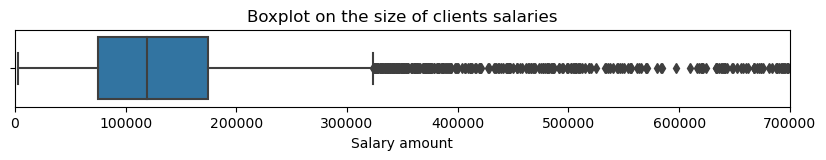

In [25]:
display(data['est_salary'].describe())
print('95 and 99 percentiles of the salary column:', np.percentile(data['est_salary'],[95, 99]))

plt.figure(figsize=(10,1))
sns.boxplot(data=data, x='est_salary')
plt.xlim(0, 700000)
plt.title('Boxplot on the size of clients salaries', fontsize=12)
plt.xlabel('Salary amount', fontsize=10);
# building a boxplot of clients' salary amounts

<div style="border:solid green 2px; padding: 20px">
    The minimum value in the salary column is 2546, which is much lower than the minimum wage. We do not know exactly for which period the data is provided, so it is not possible to determine the exact value of the minimum wage at the upload stage. In 2020. The minimum wage in the Yaroslavl region was 12130 rubles, in 2021 - 12792 rubles, in 2022 - 13890 rubles. Let's take the min minimum wage for three years - for 2020 - as the threshold value, and check how many bank clients have wages below this threshold.

In [26]:
low_salary = data.query('est_salary < 12130')
low_salary

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
443,207658,875,Yaroslavl,Female,76,5,676450.87,3,0,1,11319.50,0
505,205035,725,Rybinsk,Female,77,3,73.00,2,0,1,8729.84,0
1519,207521,819,Rybinsk,Male,63,4,597930.59,2,0,1,10677.73,0
1699,155567,747,Rostov,Male,25,0,5750.92,1,1,0,7054.82,0
1752,161271,836,Yaroslavl,Female,19,4,7703.05,4,1,1,5043.14,0
1882,151268,852,Rostov,Female,63,5,373070.37,1,1,1,8587.79,0
1987,160979,788,Rybinsk,Male,24,4,118438.82,2,1,0,8401.97,0
2172,143340,830,Yaroslavl,Female,72,2,294375.63,3,1,1,8032.18,0
2184,201407,938,Rybinsk,Female,69,1,325483.52,3,0,1,3487.33,0
2660,140105,821,Rostov,Female,75,7,631805.72,1,1,0,8894.57,0


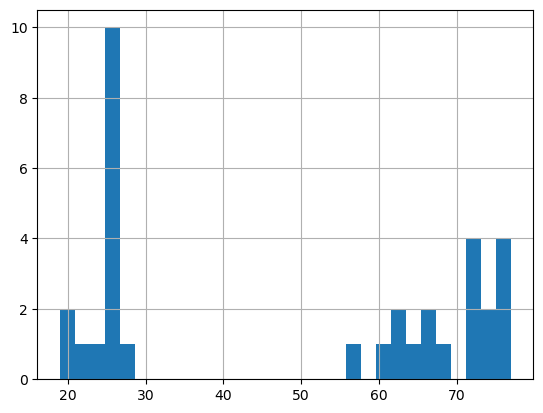

In [27]:
low_salary['age'].hist(bins=30);

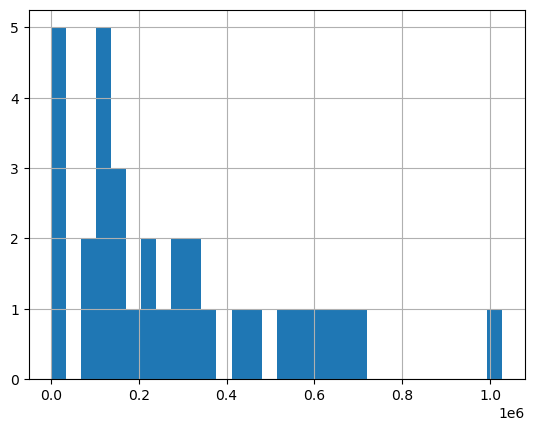

In [28]:
low_salary['balance'].hist(bins=30);

In [29]:
display(low_salary['city'].value_counts())
display(low_salary['credit_card'].value_counts())
display(low_salary['churn'].value_counts())
low_salary['last_activity'].value_counts()

Rybinsk      16
Yaroslavl     9
Rostov        8
Name: city, dtype: int64

1    23
0    10
Name: credit_card, dtype: int64

0    32
1     1
Name: churn, dtype: int64

1    18
0    15
Name: last_activity, dtype: int64

<div style="border:solid green 2px; padding: 20px">
   33 clients of the bank (0.33% of the total number) have salaries less than the minimum wage. However, it should be noted that sometimes employees are employed not on a full-time basis, but on 0.5 or even less. This is often found in budgetary institutions (including educational institutions) or in production facilities. Also in the dataframe there is no data on the type of employment of clients. Perhaps, the person is not in a permanent place of work, and received piecework pay under a fixed-term labor contract. In these cases, the amount can be any amount. 
    
    The majority of clients with wages below the minimum wage are either young people under 25 (probably students) or people of retirement age from 60 years old. 10 people aged 26-27 also have salaries below the minimum wage: most of them are from small towns of Rostov and Rybinsk, where the level of salaries is lower, and perhaps they are not employed full-time or on fixed-term contracts. There are no middle-aged people with salaries below the minimum wage in the dataset.
    
    The balance of most of these clients is less than 400 thousand, 23 out of 33 clients have a credit card, a little more than half of them are active, and all but one client are not current. Thus, the share of clients with salaries below the minimum wage is extremely small, but such salaries may well be among young people and pensioners (part-time or piecework), so the data look plausible and should not be deleted.

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

95 and 99 percentiles of the balance column: [2114078.394 4827211.159]


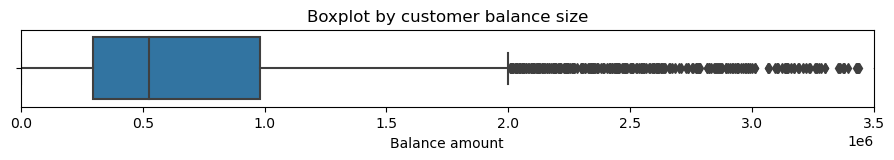

In [30]:
display(data['balance'].describe())
print('95 and 99 percentiles of the balance column:', np.nanpercentile(data['balance'],[95, 99]))

plt.figure(figsize=(11,1))
sns.boxplot(data=data, x='balance')
plt.xlim(0, 3500000)
plt.title('Boxplot by customer balance size', fontsize=12)
plt.xlabel('Balance amount', fontsize=10);
# building a boxplot by client balance size

count    9974.000000
mean      848.682575
std        65.399720
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

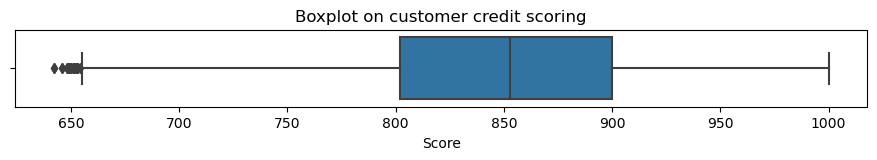

In [31]:
display(data['score'].describe())
plt.figure(figsize=(11,1))
sns.boxplot(data=data, x='score')
plt.title('Boxplot on customer credit scoring', fontsize=12)
plt.xlabel('Score', fontsize=10);
# construction of a boxplot for customer credit scoring

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

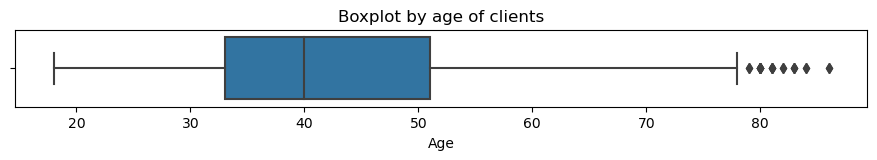

In [32]:
display(data['age'].describe())
plt.figure(figsize=(11,1))
sns.boxplot(data=data, x='age')
plt.title('Boxplot by age of clients', fontsize=12)
plt.xlabel('Age', fontsize=10);
# building boxplot by client age

In [33]:
data.query('products == 0') # verification of customers with zero products (which cannot be the case)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8939,147837,962,Rybinsk,Female,79,3,NaN,0,0,0,25063.96,1


In [34]:
data = data.query('products != 0') # deleting a customer with zero products
data = data.reset_index(drop=True)
data.shape[0]

9973

<div style="border:solid green 2px; padding: 20px">
    The median salary value is 119,626, with a minimum salary of 25,463 and a maximum of 1,395,064. There are a lot of anomalous values after the value of 320,000, but these could be salaries in executive positions, so it is not worth deleting these rows.
    
    In the balance column, the median value is 524,295, the minimum is 0, and the maximum is over 119,113,600. As with salaries, there are a lot of anomalous values (from 2 million and above), and these could all be the real savings of a certain range of people. So the anomalies in this column should not be removed either.
    
    Almost all credit scoring scores are within the 1st and 3rd quartiles, there are a few outliers below 670 points. This may be due to some customers' poor credit history, late payments, etc. The median age value is 40 years old, but there are a few older clients ranging from 78 to 86 years old. These customers may be receiving a pension from this bank or have a deposit.
    
    One row is found with a customer who has 0 bank products. Since this cannot be the case, this row should be deleted.
    
**Thus, all anomalous values are quite real for certain categories of clients, and it is not reasonable to delete such a number of lines.**

## Exploratory data analysis

### Identification of significant attributes of churn (intervals of characteristic values that are associated with increased churn).

In [35]:
data_copy = pd.get_dummies(data, columns=['gender'], drop_first=False) 
data_copy = data_copy.join(pd.get_dummies(data_copy.city))
# converting data in columns with gender and city to binary type and writing these data to a new dataset
data_copy.head()

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Female,gender_Male,Rostov,Rybinsk,Yaroslavl
0,183012,850,Rybinsk,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861,Rybinsk,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892,Rybinsk,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866,Yaroslavl,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730,Yaroslavl,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


In [36]:
print('Average percentage of customers who left:', round(data['churn'].mean(), 2))
data_copy.groupby('churn').agg('mean') # average values in all columns grouped by outflow

Average percentage of customers who left: 0.18


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,gender_Female,gender_Male,Rostov,Rybinsk,Yaroslavl
churn,,,,,,,,,,,,,,
0,171928.110607,845.396199,43.020846,2.378296,7.330316e+05,1.758921,0.708890,0.482894,147674.637881,0.533047,0.466953,0.141140,0.275414,0.583446
1,170992.833883,863.361936,41.429593,3.763476,1.134458e+06,2.377338,0.551705,0.702420,148357.483157,0.349285,0.650715,0.145765,0.239824,0.614411


<div style="border:solid green 2px; padding: 20px">
    In the subgroup of departing clients, the average credit scoring is slightly higher than in the group of remaining clients, age is approximately the same, and the number of property scores is higher for departing clients - 3.76 on average, while for remaining clients it is -2.38. The average value of the balance column is significantly higher in the subgroup of departed customers (1,134,458 vs. 733,031 remaining customers), this is likely due to the large number of customers with abnormally large balance amounts falling into this subgroup. The average value of the number of products is also higher for current customers, at 2.38, and 1.76 for the remaining customers. There are about 15% more credit cards for the remaining customers, and the number of active customers is about 22% higher in the churn group. In contrast to the balance, average salaries are about equal in both subgroups. By city, there are small differences between churned and nonchurned customers. Men are much more numerous among the churners, about 65%.

    Thus, looking at the general signs, we can assume that among the churners there are more "quality" clients with more products, ownership points, balance, and a higher share of active clients. Let's look at the data in more detail.

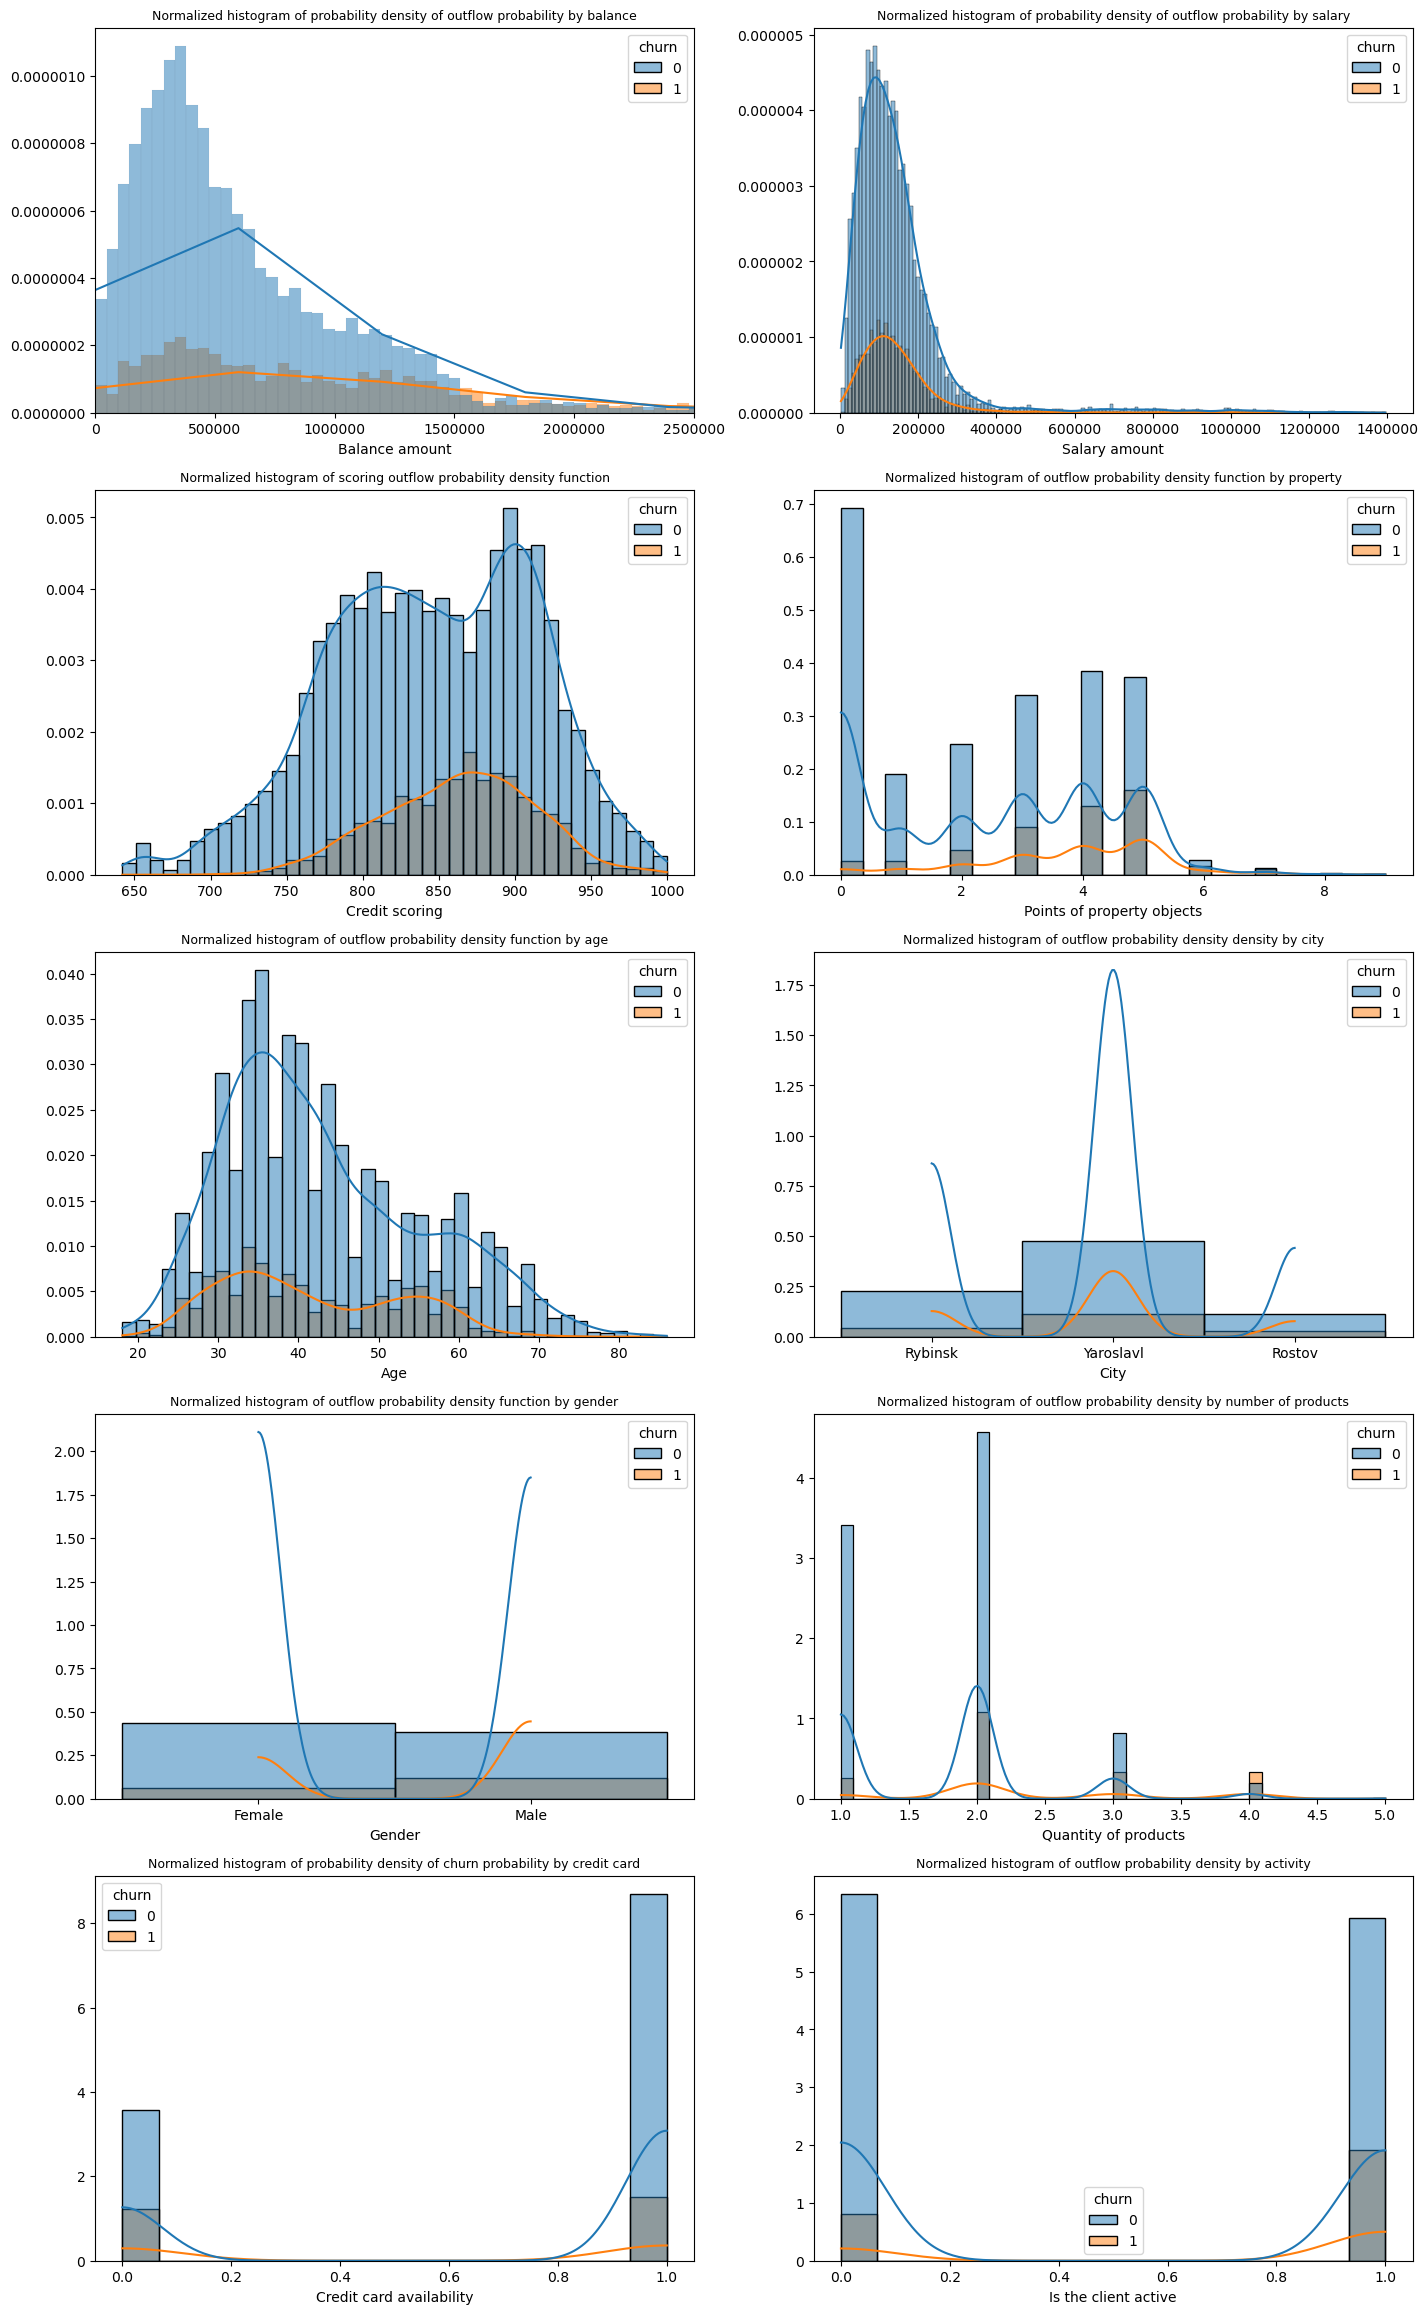

In [37]:
fig, ax = plt.subplots(figsize = (17, 29))
ax1 = plt.subplot(5, 2, 1)
sns.histplot(
    data=data,
    x='balance',
    hue='churn',
    bins=2500,
    stat='density',
    common_norm='False',
    ax=ax1,
    #palette="coolwarm",
    kde=True
);
plt.xlim(0, 2500000)
plt.xlabel('Balance amount')
plt.ylabel('')
plt.title('Normalized histogram of probability density of outflow probability by balance', fontsize=9)
plt.ticklabel_format(style='plain');

ax2 = plt.subplot(5, 2, 2)
sns.histplot(
    data=data,
    x='est_salary',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax2,
    #palette="Spectral",
    kde=True
);
#plt.xlim(0, 2500000)
plt.xlabel('Salary amount')
plt.ylabel('')
plt.title('Normalized histogram of probability density of outflow probability by salary', fontsize=9)
plt.ticklabel_format(style='plain');

ax3 = plt.subplot(5, 2, 3)
sns.histplot(
    data=data,
    x='score',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax3,
    #palette="viridis",
    kde=True
);
plt.xlabel('Credit scoring')
plt.ylabel('')
plt.title('Normalized histogram of scoring outflow probability density function', fontsize=9);

ax4 = plt.subplot(5, 2, 4)
sns.histplot(
    data=data,
    x='equity',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax4,
    #palette="icefire",
    kde=True
);
plt.xlabel('Points of property objects')
plt.ylabel('')
plt.title('Normalized histogram of outflow probability density function by property', fontsize=9);

ax5 = plt.subplot(5, 2, 5)
sns.histplot(
    data=data,
    x='age',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax5,
    #palette="viridis",
    kde=True
);
plt.xlabel('Age')
plt.ylabel('')
plt.title('Normalized histogram of outflow probability density function by age', fontsize=9);

ax6 = plt.subplot(5, 2, 6)
sns.histplot(
    data=data,
    x='city',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax6,
    #palette="viridis",
    kde=True
);
plt.xlabel('City')
plt.ylabel('')
plt.title('Normalized histogram of outflow probability density density by city', fontsize=9);

ax7 = plt.subplot(5, 2, 7)
sns.histplot(
    data=data,
    x='gender',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax7,
    #palette="viridis",
    kde=True
);
plt.xlabel('Gender')
plt.ylabel('')
plt.title('Normalized histogram of outflow probability density function by gender', fontsize=9);

ax8 = plt.subplot(5, 2, 8)
sns.histplot(
    data=data,
    x='products',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax8,
    #palette="viridis",
    kde=True
);
plt.xlabel('Quantity of products')
plt.ylabel('')
plt.title('Normalized histogram of outflow probability density by number of products', fontsize=9);

ax9 = plt.subplot(5, 2, 9)
sns.histplot(
    data=data,
    x='credit_card',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax9,
    #palette="vlag",
    kde=True
);
plt.xlabel('Credit card availability')
plt.ylabel('')
plt.title('Normalized histogram of probability density of churn probability by credit card', fontsize=9);

ax10 = plt.subplot(5, 2, 10)
sns.histplot(
    data=data,
    x='last_activity',
    hue='churn',
    stat='density',
    common_norm='False',
    ax=ax10,
    #palette="icefire",
    kde=True
);
plt.xlabel('Is the client active')
plt.ylabel('')
plt.title('Normalized histogram of outflow probability density by activity', fontsize=9);
# construction of outflow histograms for all other parameters using normalized data

<div style="border:solid green 2px; padding: 20px">
    According to the constructed histograms, the least inclined to leave the bank are clients with balance up to 750 thousand. And the larger the balance, the greater the number of outflow clients, especially among clients with balance from 1,600 mln to 2.5 mln. Also clients with salary up to 200 thousand are least inclined to leave the bank, and among clients with higher salary the probability of leaving the bank is somewhat higher.
    
    Despite the low credit rating, such clients are not in a hurry to terminate the agreement with the bank. Clients with a scoring of 860-880 points are most inclined to leave the bank. The least outflow is among clients with zero ownership score, and the most outflow is among clients with 4-6 scores. 
    
    Younger customers under 25 and older customers over 60 are the least likely to leave the bank. People aged 27-28 and 50-60 are the most likely to leave the bank. The greatest number of customers leaving the bank is among residents of Yaroslavl. Men are much more likely to complete the service in the bank than women. Most often clients with 1-2 products stay in the bank, and clients with 3-4 products leave the bank more often. Clients without credit cards and active clients also leave the bank much more often than clients with credit cards and inactive clients.

### Study of trait correlations using the Phik method

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


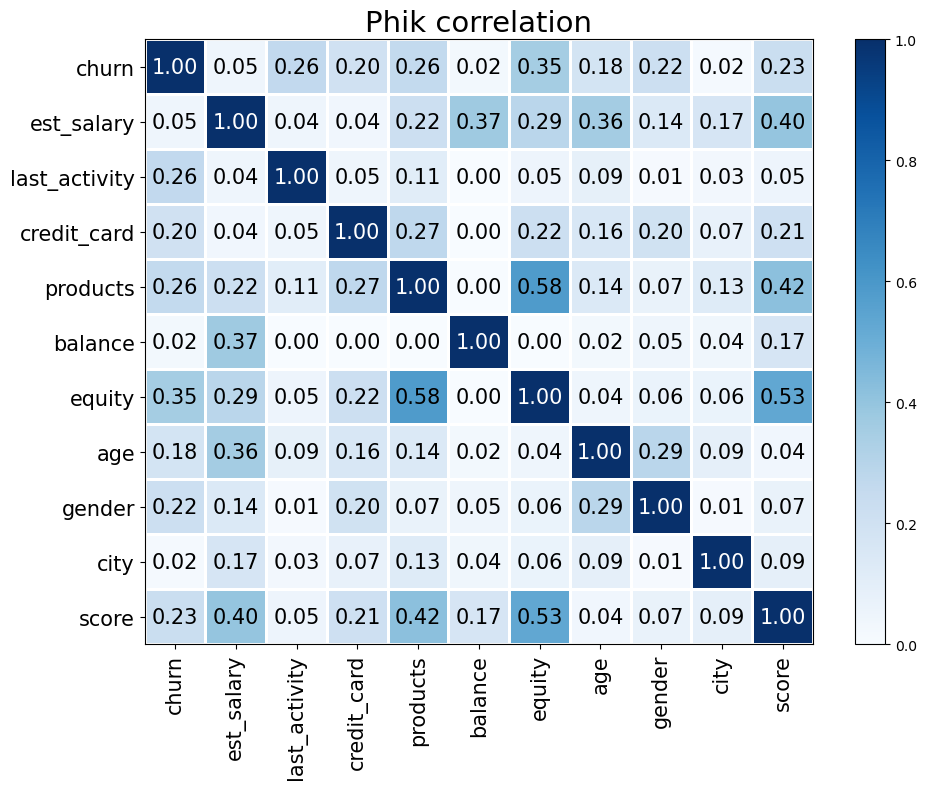

In [38]:
phik_corr = data.drop(['user_id'], axis=1)
phik_corr = phik_corr.phik_matrix() # Phik application

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"Phik correlation", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()
# correlation matrix construction

<div style="border:solid green 2px; padding: 20px">
     When considering all parameters, the largest correlation relationship between number of products and ownership scores is 0.58, credit scoring and ownership scores is 0.53, number of products and credit scoring is 0.42, salary and credit scoring is 0.4, and salary and balance is 0.37. 
    
    The least linear relationship is observed between balance scores with several parameters: ownership scores, number of products, credit scoring, and activity - 0; city and gender - 0.01, gender and activity - 0.01, balance and age, balance and churn - 0.02 each, churn and city - 0.02, city and activity - 0.03, salary with credit scoring and activity - 0.04 each.

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


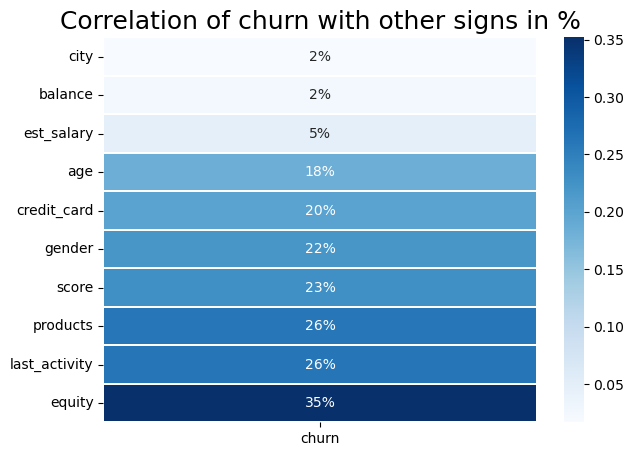

In [39]:
plt.figure(figsize = (7, 5))

sns.heatmap(
    data.phik_matrix().loc[:, ['churn']]
    .drop(['churn', 'user_id'])
    .sort_values('churn'), annot=True, fmt='.0%', cmap='Blues', linewidths=0.1, linecolor='white')
plt.title('Correlation of churn with other signs in %', fontsize=18)

plt.show()
# construction of heat map by correlation of churn with other attributes in percentage

<div style="border:solid green 2px; padding: 20px">
    In general, the correlation of outflow with other parameters is not very high - the maximum indicator is 35%, while the correlation of other parameters with each other reaches 58%.
    
    The highest correlation is observed between churn and the number of property scores - 35%, churn and two parameters: activity and number of products - 26%, churn and credit scoring - 23%, churn and gender - 22%. The least correlation between churn and gender and churn and balance sheet is 2% each, and churn and salary is 5%.

### Formation and analysis of portraits of typical customers who are inclined and not inclined to leave the bank, based on comparison of attributes

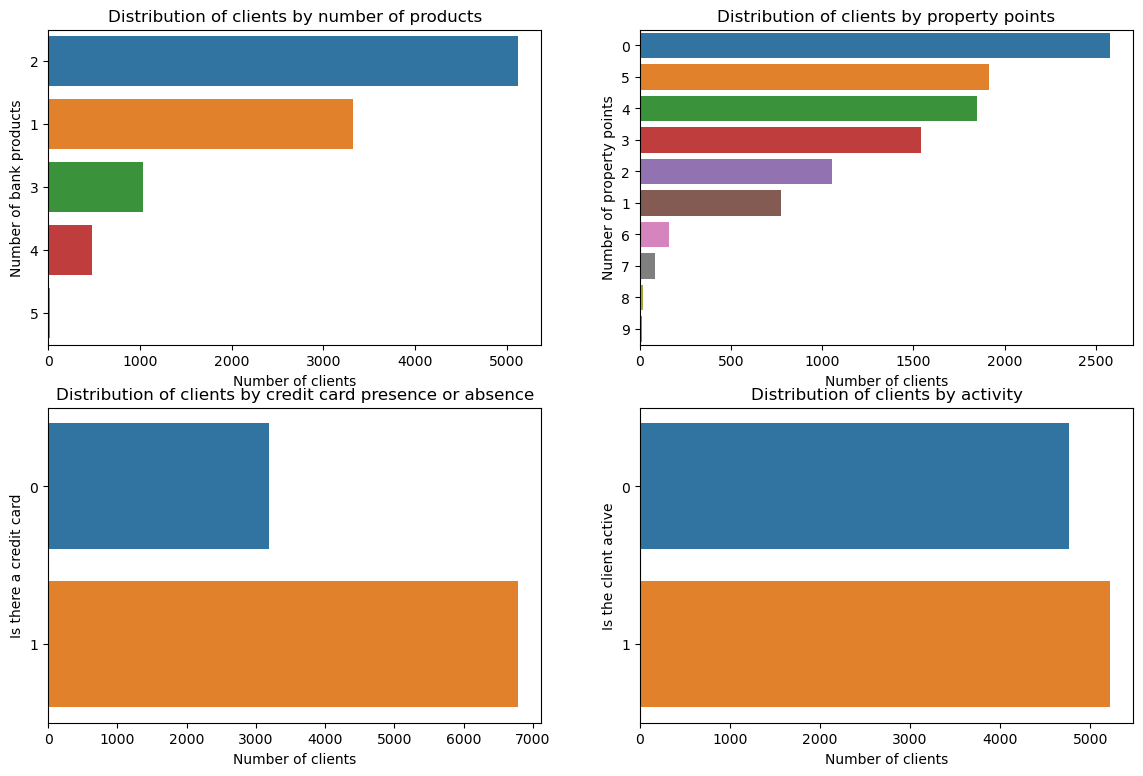

In [40]:
products = data.groupby('products')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)
equity = data.groupby('equity')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)
# creating tables for graphing

fig, ax = plt.subplots(figsize = (14, 9))
ax1 = plt.subplot(2, 2, 1)
sns.barplot(x='user_id', y='products', data=products, orient='h', order = products["products"], ax=ax1)
plt.title('Distribution of clients by number of products')
plt.xlabel('Number of clients')
plt.ylabel('Number of bank products');

ax2 = plt.subplot(2, 2, 2)
sns.barplot(x='user_id', y='equity', data=equity, orient='h', order = equity["equity"], ax=ax2)
plt.title('Distribution of clients by property points')
plt.xlabel('Number of clients')
plt.ylabel('Number of property points');

ax3 = plt.subplot(2, 2, 3)
sns.barplot(x='count', y='credit_card', data=data.groupby('credit_card').agg(count=('user_id','count'))
            .reset_index(), orient='h', ax=ax3)
plt.title('Distribution of clients by credit card presence or absence')
plt.xlabel('Number of clients')
plt.ylabel('Is there a credit card');

ax4 = plt.subplot(2, 2, 4)
sns.barplot(x='count', y='last_activity', data=data.groupby('last_activity').agg(count=('user_id','count'))
            .reset_index(), orient='h', ax=ax4)
plt.title('Distribution of clients by activity')
plt.xlabel('Number of clients')
plt.ylabel('Is the client active');
# construction of bar charts to visualize trends of four parameters

In [41]:
print('Number of clients with low credit rating:', data.query('score < 740')['user_id'].count())
print('Share of clients with low credit rating of the total number of customers in %:', \
round((data.query('score < 740')['user_id'].count() * 100 / len(data)), 2))
print('Of those who left the bank:', data.query('score < 740 & churn ==1')['user_id'].count())
print('Number of clients with a low credit rating who have a credit card:', \
data.query('score < 740 & credit_card ==1')['user_id'].count())
print('Number of clients with low credit rating who do not have a credit card:', \
data.query('score < 740 & credit_card ==0')['user_id'].count())

Number of clients with low credit rating: 527
Share of clients with low credit rating of the total number of customers in %: 5.28
Of those who left the bank: 9
Number of clients with a low credit rating who have a credit card: 504
Number of clients with low credit rating who do not have a credit card: 23


In [42]:
print('Number of clients with high credit rating:', data.query('score > 880')['user_id'].count())
print('Share of clients with high credit rating from the total number of customers in %:', \
round((data.query('score > 880')['user_id'].count() * 100 / len(data)), 2))
print('Of those who left the bank:', data.query('score > 880 & churn ==1')['user_id'].count())
print('Share of churns among clients with high credit rating in %:', \
round((data.query('score > 880 & churn ==1')['user_id'].count() * 100 / data.query('score > 880')['user_id']\
.count()), 2))
print('Number of clients with a high credit rating who have a credit card:', \
data.query('score > 880 & credit_card ==1')['user_id'].count())
print('Number of clients with high credit rating who do not have a credit card:', \
data.query('score > 880 & credit_card ==0')['user_id'].count())
print('Number of clients with a credit card who do not have other products:', \
data.query('credit_card ==1 & products ==1')['user_id'].count())
print('Percentage of customers with a credit card who have a credit card as their only product:', \
round(data.query('credit_card ==1 & products ==1')['user_id'].count() *100 / data.query('credit_card ==1')\
['user_id'].count(), 2))

Number of clients with high credit rating: 3628
Share of clients with high credit rating from the total number of customers in %: 36.38
Of those who left the bank: 705
Share of churns among clients with high credit rating in %: 19.43
Number of clients with a high credit rating who have a credit card: 2427
Number of clients with high credit rating who do not have a credit card: 1201
Number of clients with a credit card who do not have other products: 2870
Percentage of customers with a credit card who have a credit card as their only product: 42.31


In [43]:
print('Number of clients with large balances:', data.query('balance > 2000000')['user_id'].count())
print('Share of clients with large balance from the total number of clients in %:', \
round((data.query('balance > 2000000')['user_id'].count() * 100 / len(data)), 2))
print('Of those who left the bank:', data.query('balance > 2000000 & churn ==1')['user_id'].count())
print('Share of churn among clients with large balance in %:', round((data.query('balance > 2000000 & churn ==1') \
['user_id'].count() * 100 / data.query('balance > 2000000')['user_id'].count()), 2))
print('Number of clients with a large balance who have a credit card:', \
data.query('balance > 2000000 & credit_card ==1')['user_id'].count())
print('Number of clients with a large balance who do not have a credit card:', \
data.query('balance > 2000000 & credit_card ==0')['user_id'].count())
print('Number of active clients with a large balance:', \
data.query('balance > 2000000 & last_activity ==1')['user_id'].count())
print('Number of customers with a large balance who have more than two banking products:', \
data.query('balance > 2000000 & products > 2')['user_id'].count())

Number of clients with large balances: 427
Share of clients with large balance from the total number of clients in %: 4.28
Of those who left the bank: 210
Share of churn among clients with large balance in %: 49.18
Number of clients with a large balance who have a credit card: 195
Number of clients with a large balance who do not have a credit card: 232
Number of active clients with a large balance: 225
Number of customers with a large balance who have more than two banking products: 154


In [44]:
typical_client = data.query('churn ==0 & (24 < age < 56) & (city == "Yaroslavl" | city == "Rybinsk") \
& equity < 6 & products < 4 & (730 <= score <= 950)')
display(typical_client)
# creation of a table with typical clients remaining in the bank

print('Percentage of "typical clients" out of the total number of remaining clients:', \
round((len(typical_client) * 100 / data.query('churn ==0')['user_id'].count()), 2))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Rybinsk,Female,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Rybinsk,Female,30,0,NaN,1,1,1,107683.34,0
6,177259,807,Yaroslavl,Female,39,3,405042.44,3,0,1,103838.32,0
7,218868,825,Yaroslavl,Female,38,4,458145.40,2,1,1,68085.48,0
8,211686,923,Yaroslavl,Male,54,5,1206337.87,2,1,0,155371.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9963,162357,822,Yaroslavl,Male,31,3,646575.17,1,1,1,88297.63,0
9964,122366,840,Yaroslavl,Female,44,3,326619.71,1,1,0,157589.59,0
9966,219924,884,Rybinsk,Female,36,0,NaN,1,1,1,169844.88,0
9968,120553,814,Rybinsk,Male,27,1,78144.65,1,0,1,18943.64,0


Percentage of "typical clients" out of the total number of remaining clients: 58.95


In [45]:
typical_churn_client = data.query('churn == 1 & (24 < age < 64) & (city == "Yaroslavl" | city == "Rybinsk") \
& equity < 6 & (1 < products < 5) & (770 <= score <= 950) & last_activity == 1')
display(typical_churn_client)
# creating a table with typical clients who left the bank

print('Percentage of "typical churned clients" out of the total number of churned clients:', \
round((len(typical_churn_client) * 100 / data.query('churn ==1')['user_id'].count()), 2))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Rybinsk,Female,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Yaroslavl,Female,51,5,1524746.26,2,0,1,174423.53,1
12,132970,845,Yaroslavl,Female,31,3,591928.52,2,1,1,112697.16,1
58,164676,860,Yaroslavl,Male,37,5,648594.03,2,1,1,213586.86,1
61,136096,896,Yaroslavl,Female,39,5,657597.09,2,0,1,266033.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,217489,893,Yaroslavl,Female,49,5,1571192.11,4,1,1,151217.99,1
9938,165238,839,Yaroslavl,Female,40,3,499865.43,2,1,1,212304.90,1
9951,218170,841,Yaroslavl,Male,29,2,235287.10,2,1,1,137494.06,1
9954,154871,892,Rybinsk,Male,39,5,636287.72,2,0,1,227288.27,1


Percentage of "typical churned clients" out of the total number of churned clients: 46.75


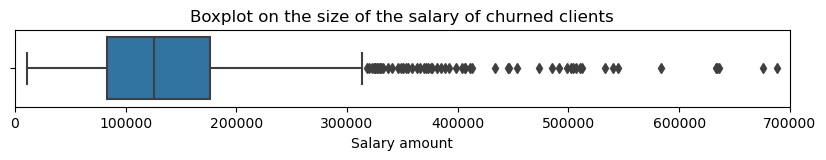

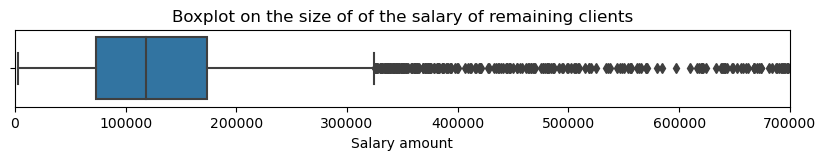

In [46]:
plt.figure(figsize=(10,1))
sns.boxplot(data=data.query('churn == 1'), x='est_salary')
plt.xlim(0, 700000)
plt.title('Boxplot on the size of the salary of churned clients', fontsize=12)
plt.xlabel('Salary amount', fontsize=10)
plt.show();
# building a boxplot of salary from churned customers

plt.figure(figsize=(10,1))
sns.boxplot(data=data.query('churn == 0'), x='est_salary')
plt.xlim(0, 700000)
plt.title('Boxplot on the size of of the salary of remaining clients', fontsize=12)
plt.xlabel('Salary amount', fontsize=10);
# building a boxplot of salary for the remaining customers

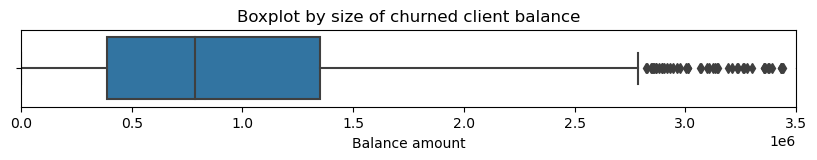

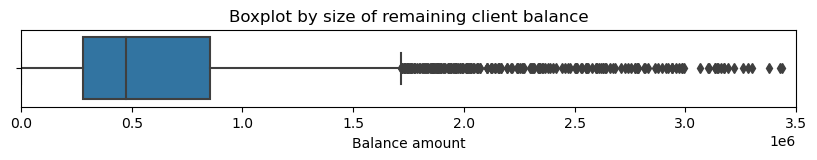

In [47]:
plt.figure(figsize=(10,1))
sns.boxplot(data=data.query('churn ==1'), x='balance')
plt.xlim(0, 3500000)
plt.title('Boxplot by size of churned client balance', fontsize=12)
plt.xlabel('Balance amount', fontsize=10)
plt.show();
# building a boxplot of balance from churned customers

plt.figure(figsize=(10,1))
sns.boxplot(data=data.query('churn ==0'), x='balance')
plt.xlim(0, 3500000)
plt.title('Boxplot by size of remaining client balance', fontsize=12)
plt.xlabel('Balance amount', fontsize=10);
# building a boxplot of balance from remaining customers

city
Rostov       0.187147
Rybinsk      0.162565
Yaroslavl    0.190128
Name: churn, dtype: float64

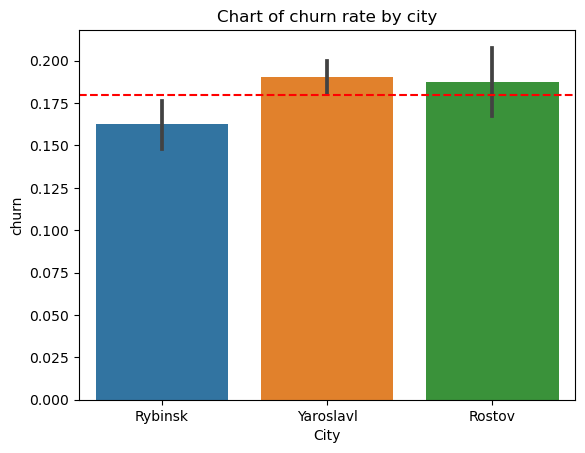

In [48]:
display(data.groupby('city')['churn'].agg('mean'))

sns.barplot(x='city', y='churn', data=data)
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Chart of churn rate by city', fontsize=12)
plt.xlabel('City', fontsize=10);
# construction of a barplot of the level of churn by cities

gender
Female    0.127459
Male      0.237027
Name: churn, dtype: float64

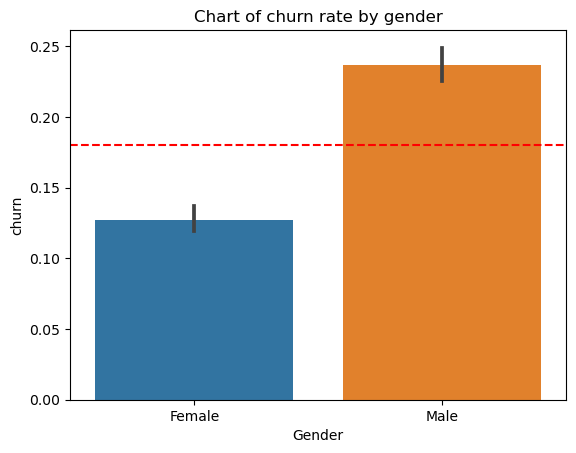

In [49]:
display(data.groupby('gender')['churn'].agg('mean'))

sns.barplot(x='gender', y='churn', data=data)
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Chart of churn rate by gender', fontsize=12)
plt.xlabel('Gender', fontsize=10);
# construction of a barplot of the level of churn by gender

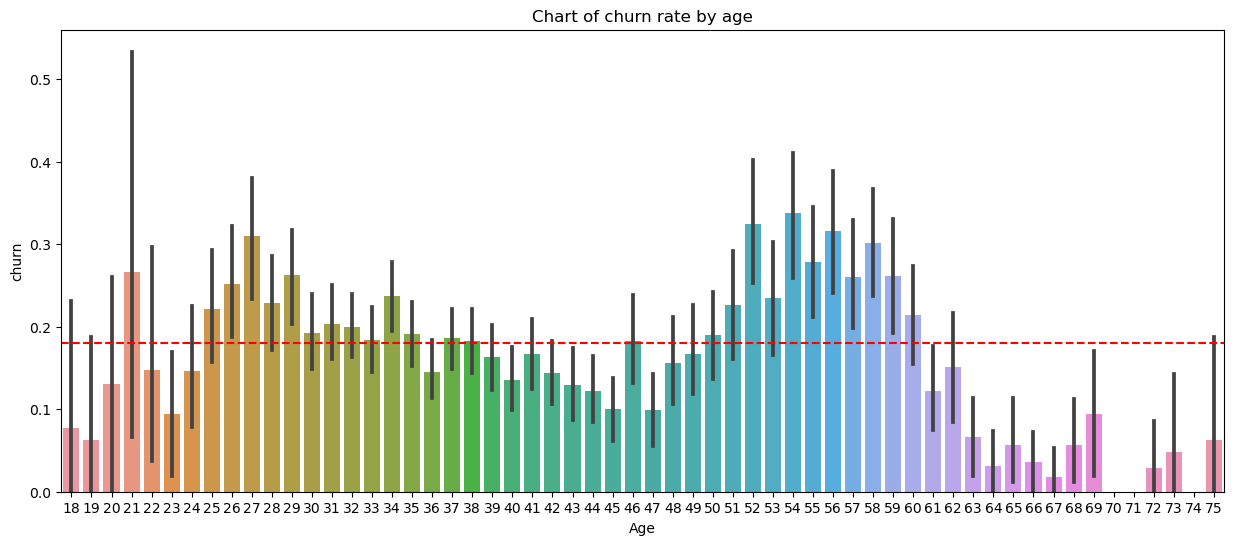

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(x='age', y='churn', data=data.query('age < 76'))
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Chart of churn rate by age', fontsize=12)
plt.xlabel('Age', fontsize=10);
# construction of a barplot of the level of churn by age

credit_card
0    0.255566
1    0.147848
Name: churn, dtype: float64

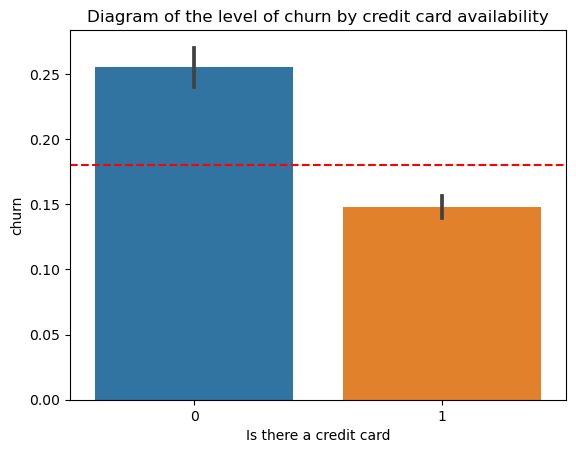

In [51]:
display(data.groupby('credit_card')['churn'].agg('mean'))

sns.barplot(x='credit_card', y='churn', data=data)
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Diagram of the level of churn by credit card availability', fontsize=12)
plt.xlabel('Is there a credit card', fontsize=10);
# construction of a barplot of the level of churn by credit card

last_activity
0    0.113703
1    0.244871
Name: churn, dtype: float64

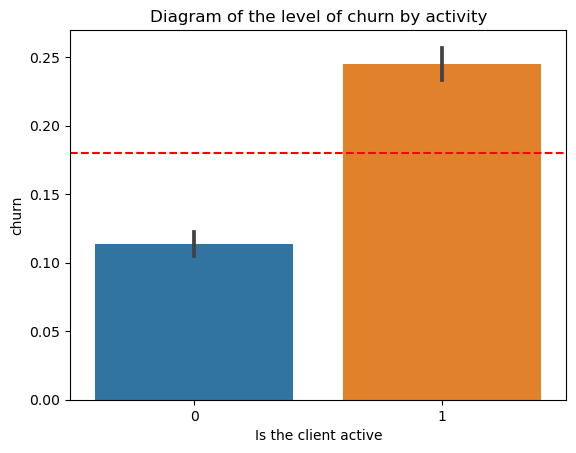

In [52]:
display(data.groupby('last_activity')['churn'].agg('mean'))

sns.barplot(x='last_activity', y='churn', data=data)
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Diagram of the level of churn by activity', fontsize=12)
plt.xlabel('Is the client active', fontsize=10);
# construction of a barplot of the level of churn by activity

products
1    0.070719
2    0.191053
3    0.286127
4    0.632911
5    0.421053
Name: churn, dtype: float64

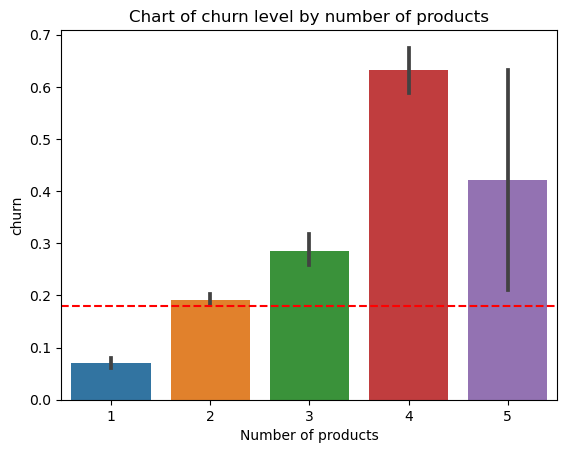

In [53]:
display(data.groupby('products')['churn'].agg('mean'))

sns.barplot(x='products', y='churn', data=data)
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Chart of churn level by number of products', fontsize=12)
plt.xlabel('Number of products', fontsize=10);
# construction of a barplot of the level of churn by number of products

equity
0    0.034938
1    0.120310
2    0.157945
3    0.208442
4    0.251218
5    0.300783
6    0.360248
7    0.462500
8    0.352941
9    0.538462
Name: churn, dtype: float64

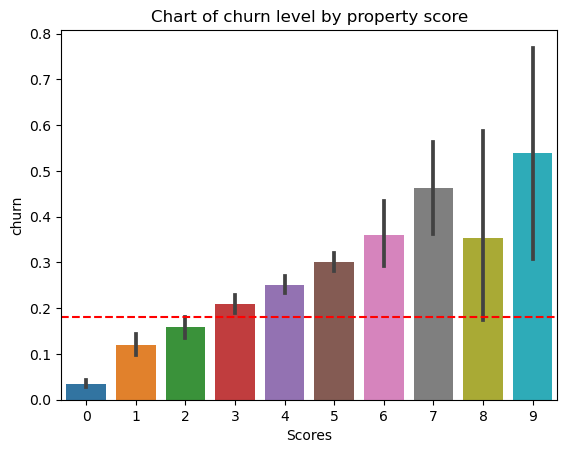

In [54]:
display(data.groupby('equity')['churn'].agg('mean'))

sns.barplot(x='equity', y='churn', data=data)
plt.axhline(y=0.18, color='red', linestyle='--') # the dotted line indicates the average churn level
plt.title('Chart of churn level by property score', fontsize=12)
plt.xlabel('Scores', fontsize=10);
#  construction of a barplot of the level of churn by property score

<div style="border:solid green 2px; padding: 20px">
   Thus:

- Most customers have 1-2 bank products, have a credit card and 0 ownership scores or 4-5 ownership scores. There are few clients with low credit scoring - 5.28%, and almost all of them have not left the bank and have a credit card despite the low score. 36.38% of customers have a high credit score, 19.43% of them have left the bank, and about a third of them have a credit card. 42.31% of customers who have taken out a credit card have it as their only product.    
- There are few clients with a balance of more than 2 million - 4.28%, but almost half of them have a credit card - 49.18%. Less than half of them have a credit card, just under a third of them have more than two products.  
- The balance of the remaining customers is mostly in the range of 1.7 million, with a median value of about 470 thousand, while those who have left are on average higher - in most cases it is in the range of 2.8 million, with a median value of about 750 thousand. The median value of wages is slightly higher in the group of those who have left, but not significantly, and the overall wage picture is similar.
- The greater the number of products and property points, the greater the number of repeat customers. There are also many more active and non-credit card customers among the churners. These data indicate that the best, most solvent clients are leaving the bank.
    
<b>Portrait of a typical client of the bank:</b> a man or woman aged 25-55 years old, living in Yaroslavl or Rybinsk, with property scores from 0 to 5, number of products from 1 to 3, credit scoring from 730 to 950, credit card as can be issued or not, the client can be active or not.
    
<b>Portrait of a typical client who left the bank:</b> In contrast to the remaining clients, where the active ones are slightly more than half, there are many more active clients among those who left. There are also more men. There are slightly more age customers - up to 65 years old. There are also more churned clients in Yaroslavl and Rybinsk. The number of products is higher for the exited clients - for "typical" clients it is from 2 to 4, credit scoring is also slightly higher - from 770. More churned clients do not have a credit card.

## Identification of customer segments based on aggregation of churn characteristics

In [55]:
seg1 = data.query('gender == "Male" & balance > 1000000 & equity > 3')
# segment formation

print('First segment: men with balances over 1 million and property points of 4 or more')
print('Segment size:', seg1.shape[0])
print('Number of churn clients:', seg1.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg1.query('churn ==1')['user_id'].count()/seg1.shape[0]*100, 2))

First segment: men with balances over 1 million and property points of 4 or more
Segment size: 746
Number of churn clients: 374
Percentage of churn clients in the segment: 50.13


In [56]:
seg2 = data.query('(25 <= age <= 35) & score > 850 & equity > 3')
# segment formation

print('The second segment: clients 25 to 35 years old, with credit scoring over 850 and property scores of 4 or more')
print('Segment size:', seg2.shape[0])
print('Number of churn clients:', seg2.query('churn == 1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg2.query('churn ==1')['user_id'].count()/seg2.shape[0]*100, 2))

The second segment: customers 25 to 35 years old, with credit scoring over 850 and property scores of 4 or more
Segment size: 757
Number of churn clients: 377
Percentage of churn clients in the segment: 49.8


In [57]:
seg3 = data.query('score > 850 & last_activity == 1 & credit_card == 0')
# segment formation

print('Third segment: active clients without a credit card with a scoring above 850 points')
print('Segment size:', seg3.shape[0])
print('Number of churn clients:', seg3.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg3.query('churn ==1')['user_id'].count()/seg3.shape[0]*100, 2))

Third segment: active customers without a credit card with a scoring above 850 points
Segment size: 966
Number of churn clients: 461
Percentage of churn clients in the segment: 47.72


In [58]:
seg4 = data.query('balance > 1000000 & credit_card == 0 & equity > 3')
# segment formation

print('Fourth segment: clients with balances over 1 million, no credit card and property points of 4 or more')
print('Segment size:', seg4.shape[0])
print('Number of churn clients:', seg4.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg4.query('churn ==1')['user_id'].count()/seg4.shape[0]*100, 2))

Fourth segment: clients with balances over 1 million, no credit card and property points of 4 or more
Segment size: 685
Number of churn clients: 320
Percentage of churn clients in the segment: 46.72


In [59]:
seg5 = data.query('products <= 2 & balance > 1000000 & last_activity == 1')
# segment formation

print('Fifth segment: active clients with balance over 1 mln and 1-2 bank products')
print('Segment size:', seg5.shape[0])
print('Number of churn clients:', seg5.query('churn == 1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg5.query('churn == 1')['user_id'].count()/seg5.shape[0]*100, 2))

Fifth segment: active clients with balance over 1 mln and 1-2 bank products
Segment size: 669
Number of churn clients: 309
Percentage of churn clients in the segment: 46.19


In [60]:
seg6 = data.query('(50 <= age <= 60) & last_activity == 1 & equity >= 3')
# segment formation

print('Sixth segment: active clients between 50 and 60 years old, with property scores greater than three')
print('Segment size:', seg6.shape[0])
print('Number of churn clients:', seg6.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg6.query('churn == 1')['user_id'].count()/seg6.shape[0]*100, 2))

Sixth segment: active clients between 50 and 60 years old, with property scores greater than three
Segment size: 544
Number of churn clients: 246
Percentage of churn clients in the segment: 45.22


In [61]:
seg7 = data.query('(25 <= age <= 35) & est_salary > 100000 & last_activity ==1')
# segment formation

print('Seventh segment: active clients from 25 to 35 years old, with a salary of more than 100 thousand')
print('Segment size:', seg7.shape[0])
print('Number of churn clients:', seg7.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg7.query('churn ==1')['user_id'].count()/seg7.shape[0]*100, 2))

Seventh segment: active clients from 25 to 35 years old, with a salary of more than 100 thousand
Segment size: 860
Number of churn clients: 326
Percentage of churn clients in the segment: 37.91


In [62]:
seg8 = data.query('(50 <= age <= 60) & score > 800 & products <= 3')
# segment formation

print('Eighth segment: clients 50 to 60 years old, with credit scoring over 800 and 1-3 bank products')
print('Segment size:', seg8.shape[0])
print('Number of churn clients:', seg8.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg8.query('churn ==1')['user_id'].count()/seg8.shape[0]*100, 2))

Eighth segment: clients 50 to 60 years old, with credit scoring over 800 and 1-3 bank products
Segment size: 1246
Number of churn clients: 344
Percentage of churn clients in the segment: 27.61


In [63]:
seg9 = data.query('gender == "М" & city == "Ярославль" & last_activity == 1 & credit_card==1')
# segment formation

print('Ninth segment: men from Yaroslavl, active clients, with credit cards')
print('Segment size:', seg9.shape[0])
print('Number of churn clients:', seg9.query('churn ==1')['user_id'].count())
print('Percentage of churn clients in the segment:', \
round(seg9.query('churn ==1')['user_id'].count()/seg9.shape[0]*100, 2))

Ninth segment: men from Yaroslavl, active clients, with credit cards
Segment size: 0
Number of churn clients: 0
Percentage of churn clients in the segment: nan


<div style="border:solid green 2px; padding: 20px">
    Nine segments with a large share of churned clients were formed and prioritized. In the first segment this share is 50.13%, in the second segment - 49.8%, in the third segment - 47.72%. In the last ninth segment the share of churned clients is 25.15%.

## Statistical hypothesis testing

### Testing the first hypothesis about the difference in income between those clients who left and those who stayed

<div style="border:solid green 2px; padding: 20px">
    
**Null Hypothesis H₀:**
     The revenues of clients who stayed and clients who left do not differ.
    
**Alternative Hypothesis H₁:**
    The revenues of clients who stayed and clients who left are different.
    
 Python has a special method for testing the hypothesis that the mean of two general population samples is equal: scipy.stats.ttest_ind (array1, array2, equal_var). This is the method we use.
    
    The null hypothesis is always formulated with an equality condition inside. And the alternative hypothesis is the opposite of the null hypothesis (i.e., not equal). The samples are the data presented in the dataset. We define the level of statistical significance as 5%. Since the size of samples differs significantly and there is no reason to assume that the dispersions of the general population for the selected indicator are equal, we set the parameter equal_var = False.

In [64]:
sample_1 = data[data['churn']==1]['est_salary'] # salary of churned clients
sample_2 = data[data['churn']==0]['est_salary'] # salary of remaining customers

alpha = .05 # critical level of statistical significance
            # if p-value is less than it - reject the hypothesis

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis. The salaries of clients who left and clients who stayed are different")
else:
    print("We failed to reject the null hypothesis. There is no reason to believe that the salaries of clients who left and clients who stayed are different")

p-value: 0.8354803526840116
We failed to reject the null hypothesis. There is no reason to believe that the salaries of clients who left and clients who stayed are different


### Testing the second hypothesis about the difference in credit scoring between those clients who left and those clients who stayed

<div style="border:solid green 2px; padding: 20px">

**Null Hypothesis H₀:**
     Credit scoring of clients who stayed and clients who left do not differ.
    
**Alternative Hypothesis H₁:**
    The credit scoring of clients who stayed and clients who left are different.

In [65]:
sample_3 = data[data['churn']==1]['score'] # credit scoring of churned clients
sample_4 = data[data['churn']==0]['score'] # credit scoring of remaining clients

alpha = .05 # critical level of statistical significance
            # if p-value is less than it - reject the hypothesis

results = st.ttest_ind(sample_3, sample_4, equal_var = False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis. Credit scoring of churned clients and remaining clients is different")
else:
    print("Failed to reject the null hypothesis. There is no reason to believe that the credit scoring of clients who have left and remaining clients are different")

p-value: 1.3179430198200596e-37
Rejecting the null hypothesis. Credit scoring of churned clients and remaining clients is different


### Testing the third hypothesis about the difference in the number of bank products between those clients who left and those clients who stayed

<div style="border:solid green 2px; padding: 20px">
    
**Null Hypothesis H₀:**
     The number of products of clients who stayed and clients who left do not differ.
    
**Alternative Hypothesis H₁:**
    The number of products of clients who stayed and clients who left are different.

In [66]:
sample_5 = data[data['churn']==1]['products'] # number of products from churned clients
sample_6 = data[data['churn']==0]['products'] # the number of products from the remaining clients

alpha = .05 # # critical level of statistical significance
            # if p-value is less than it - reject the hypothesis
    
results = st.ttest_ind(sample_5, sample_6, equal_var = False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis. The number of products of churned clients and clients who stayed are different")
else:
    print("It was not possible to reject the null hypothesis. There is no reason to believe that the number of products of churned clients and clients who stayed are different")

p-value: 1.2671065900765871e-138
We reject the null hypothesis. The number of products of churned clients and clients who stayed are different


### Testing the fourth hypothesis about the difference in ownership scores between those clients who left and those clients who stayed

<div style="border:solid green 2px; padding: 20px">
    
**Null Hypothesis H₀:**
     The number of ownership scores of clients who stayed and clients who left do not differ.
    
**Alternative Hypothesis H₁:**
    The number of ownership scores of clients who stayed and clients who left are different.

In [67]:
sample_7 = data[data['churn']==1]['equity'] # the number of ownership points of churned clients
sample_8 = data[data['churn']==0]['equity'] # the number of ownership points of the remaining customers

alpha = .05 # # # critical level of statistical significance
            # if p-value is less than it - reject the hypothesis

results = st.ttest_ind(sample_7, sample_8, equal_var = False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis. The number of property points of churned clients, and clients who stayed, is different")
else:
    print("Failed to reject the null hypothesis. There is no reason to believe that the number of ownership points of churned clients and clients who stayed are different")

p-value: 2.2265321241808214e-196
We reject the null hypothesis. The number of property points of churned clients, and clients who stayed, is different


<div style="border:solid green 2px; padding: 20px">
    
- The first hypothesis about the difference between the salaries of remaining and churned clients was not confirmed.
- The second hypothesis about the difference in the credit scoring scores of churned and remaining clients was confirmed: statistically significant differences exist.
- The third hypothesis about the difference in the number of bank products of the churned and remaining clients was confirmed: statistically significant differences exist.
- The fourth hypothesis about the difference in the number of property points of churned and remaining clients was confirmed: statistically significant differences are present.

## General conclusions of the study and development of recommendations for working with clients who are likely to leave the bank on the basis of the highlighted attributes

**General conclusions:**

- The dataset presents data on clients of Metanprom Bank located in Yaroslavl, Rybinsk and Rostov. The share of churned clients is about 18%, which is a rather large churn rate. In this regard, the bank should conduct marketing campaigns aimed at improving interaction with churned customer segments.
- More "quality" clients - those with larger balances, high credit scoring, higher property scores and number of banking products - are most often prone to churn. At the same time, most of them don't have a credit card. The largest number of churned clients are aged 25-35 and 50-60, and men are more likely to leave the bank.
- The highest correlation is observed between churn and ownership score - 35%, churn and two parameters: activity and number of products - 26%, churn and credit scoring - 23%, churn and gender - 22%.
- Statistical hypothesis testing revealed that there is no difference between the salaries of churned and remaining clients. And there is between credit scoring scores, number of products and ownership score.
- Nine high-fidelity segments are identified. The first segment, "Men with balances over 1 million and property scores of 4 or more," has a 50.13% retention rate. The second segment "Clients between 25 and 35 years old, with credit scoring over 850 and ownership scores of 4 or more" has 49.8%, and the third segment "Active clients without credit card scoring above 850" has 47.72%. 

**Recommendations for working with clients prone to churn:**
- It is obvious that the most solvent and "quality" clients are leaving. Perhaps they lack premium service, loyalty program. Most of them were active clients, which suggests that they left for another bank that offered better premium service conditions. It is worth analyzing competitors for special conditions for VIP-clients. It is also worth considering the possibility of introducing special conditions for such clients in this bank. It is also possible to publish business articles, interviews with regional businessmen and top managers on the website or in an application. It is also worth monitoring the work of employees of the bank's offices. Perhaps premium clients are not satisfied with the level of service.
- For clients of 50-60 years old it is worth developing a retention campaign. It may contain improved conditions for transferring the insurance part of the pension to the bank, information about benefits of the pre-retirement age, discounts or collaborations with medical and health centers, calls from a "live" employee of the bank, rather than messages from a voice assistant.
- For customers aged 25-35, it is worth considering upgrading the bank's mobile application, introducing a cacheback program with a choice of categories, travel support, podcasts on music, movies, fashion, travel, etc. Influencers popular with people of this age may be worth engaging.
- For customers with high property scores, you can offer discounts on real estate, car insurance.
- For customers with high credit scoring, you can offer a rate on loans slightly lower than the standard rate, free credit card maintenance, increased credit card cashback.
- Residents of Yaroslavl, the largest city of the three, are most prone to outflow. This is probably due to the greater number of competitors. For residents of Yaroslavl you can offer discounts to establishments, stores, fitness centers of the city, additional services.